# Collisions in Seattle

## 1. Introduction-Business Plan

The objective of this project is to predict the severity of an accident in Seattle using several predictors. Using machine learning techniques a predictive framewrok will be developed for the severity of collisions in Seattle based on the available data. Severity of collisions will be predicted using related factors.
The result will be beneficial for SDOT, DMV and other related transportation agencies.

## 2. Data Description

The data used in this project is provided by Coursera. The dataset indicates 194673 observations of collision cases in Seattle. Each row of the dataset indicates a single observation. There are 37 attributes,e.g. location, weather condition, etc., in the dataset amongst which some are used in training and testing the machine learning model. The developed model will predicte accident severity based on these given attributes.

## 3. Methodology

As mentioned previously, the objective of this research is to predict the severity of an accident based on the given features. Starting with exploring the dataset:

In [44]:
import numpy as np
import pandas as pd
import os


In [45]:
Collision_df = pd.read_csv('Data-Collisions.csv', delimiter=',')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [46]:
Collision_df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [47]:
Collision_df.shape

(194673, 38)

In [48]:
Collision_df['ROADCOND'].isna().sum()

5012

In [49]:
Collision_df['SPEEDING'].isna().sum()

185340

In [50]:
Collision_df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

## 3.1. Data preparation and manipulation
I decided to select address type, collision type, person count, vehicle count, inattention id, under the influence of drug, weather, light condition, and speeding as the attributes and severity code as the target variable or class of the classidication problem.

In [51]:
Coll_df = Collision_df[['ADDRTYPE','SEVERITYCODE','SEVERITYDESC','COLLISIONTYPE','PERSONCOUNT','VEHCOUNT'
                       ,'INATTENTIONIND','UNDERINFL','WEATHER','LIGHTCOND','SPEEDING']]

In [52]:
Coll_df.head()

,ADDRTYPE,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,LIGHTCOND,SPEEDING
0,Intersection,2,Injury Collision,Angles,2,2,NaN,N,Overcast,Daylight,NaN
1,Block,1,Property Damage Only Collision,Sideswipe,2,2,NaN,0,Raining,Dark - Street Lights On,NaN
2,Block,1,Property Damage Only Collision,Parked Car,4,3,NaN,0,Overcast,Daylight,NaN
3,Block,1,Property Damage Only Collision,Other,3,3,NaN,N,Clear,Daylight,NaN
4,Intersection,2,Injury Collision,Angles,2,2,NaN,0,Raining,Daylight,NaN


Dropping nan cells from the table:

In [53]:
Coll_df.dropna(axis=0, inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
Coll_df.shape

(688, 11)

After dropping the na cells the remaining dataset is a 688x11 size table.

In [55]:
Coll_df.reset_index()


,index,ADDRTYPE,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,LIGHTCOND,SPEEDING
0,1320,Block,2,Injury Collision,Angles,4,4,Y,N,Clear,Daylight,Y
1,1572,Intersection,1,Property Damage Only Collision,Angles,3,2,Y,N,Clear,Daylight,Y
2,2918,Block,2,Injury Collision,Head On,3,2,Y,N,Clear,Daylight,Y
3,3045,Block,2,Injury Collision,Other,1,1,Y,N,Snowing,Daylight,Y
4,3499,Block,1,Property Damage Only Collision,Other,2,1,Y,0,Overcast,Dark - Street Lights On,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
683,193003,Intersection,1,Property Damage Only Collision,Other,1,1,Y,Y,Overcast,Dark - Street Lights On,Y
684,193395,Block,2,Injury Collision,Parked Car,4,4,Y,N,Clear,Daylight,Y
685,193524,Intersection,2,Injury Collision,Rear Ended,2,2,Y,N,Clear,Daylight,Y
686,194088,Block,2,Injury Collision,Rear Ended,2,2,Y,N,Raining,Daylight,Y


Exploring the data indicated that the SEVERITY CODE has two classes with different value counts. The ratio of these two classes is 282/406 which means we are dealing with an imbalanced data classification problem. In the next step, I replace the categorical variables with dummy ones to be usful in developig the model.

In [56]:
Coll_df.SEVERITYCODE.value_counts()

1    406
2    282
Name: SEVERITYCODE, dtype: int64

In [57]:
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
%matplotlib inline
import sklearn

In [58]:
Coll_df['UNDERINFL'].value_counts()

N    449
0    181
Y     41
1     17
Name: UNDERINFL, dtype: int64

In [59]:
Coll_df['UNDERINFL'].replace(to_replace=['N','Y'], value=[0,1], inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [60]:
Coll_df['UNDERINFL'].replace(to_replace=['0','1'], value=[0,1], inplace=True)

In [61]:
Coll_df['UNDERINFL'].value_counts()

0    630
1     58
Name: UNDERINFL, dtype: int64

In [62]:
Coll_df.head()

,ADDRTYPE,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,LIGHTCOND,SPEEDING
1320,Block,2,Injury Collision,Angles,4,4,Y,0,Clear,Daylight,Y
1572,Intersection,1,Property Damage Only Collision,Angles,3,2,Y,0,Clear,Daylight,Y
2918,Block,2,Injury Collision,Head On,3,2,Y,0,Clear,Daylight,Y
3045,Block,2,Injury Collision,Other,1,1,Y,0,Snowing,Daylight,Y
3499,Block,1,Property Damage Only Collision,Other,2,1,Y,0,Overcast,Dark - Street Lights On,Y


In [63]:
Coll_df['INATTENTIONIND']=pd.get_dummies(Coll_df['INATTENTIONIND'])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
Coll_df['ADDRTYPE'] = pd.get_dummies(Coll_df['ADDRTYPE'])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
Coll_df.head()

,ADDRTYPE,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,LIGHTCOND,SPEEDING
1320,0,2,Injury Collision,Angles,4,4,1,0,Clear,Daylight,Y
1572,0,1,Property Damage Only Collision,Angles,3,2,1,0,Clear,Daylight,Y
2918,0,2,Injury Collision,Head On,3,2,1,0,Clear,Daylight,Y
3045,0,2,Injury Collision,Other,1,1,1,0,Snowing,Daylight,Y
3499,0,1,Property Damage Only Collision,Other,2,1,1,0,Overcast,Dark - Street Lights On,Y


In [66]:
Coll_df['WEATHER'] = pd.get_dummies(Coll_df['WEATHER'])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
Coll_df['LIGHTCOND'] = pd.get_dummies(Coll_df['LIGHTCOND'])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
Coll_df['SPEEDING'] = pd.get_dummies(Coll_df['SPEEDING'])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
Coll_df = Coll_df.reset_index(drop=True)

In [70]:
Coll_df.head()

,ADDRTYPE,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,LIGHTCOND,SPEEDING
0,0,2,Injury Collision,Angles,4,4,1,0,1,0,1
1,0,1,Property Damage Only Collision,Angles,3,2,1,0,1,0,1
2,0,2,Injury Collision,Head On,3,2,1,0,1,0,1
3,0,2,Injury Collision,Other,1,1,1,0,0,0,1
4,0,1,Property Damage Only Collision,Other,2,1,1,0,0,0,1


I defined the X features out of the dataset. It should be noted that in order to be able to use sklearn we should convert pandas data frame to numpy array.
Define feature set X and a normalizing step using StandardScaler:

In [71]:
X = Coll_df[['ADDRTYPE','PERSONCOUNT','VEHCOUNT','INATTENTIONIND','UNDERINFL','LIGHTCOND','WEATHER','SPEEDING']].values

In [72]:
X

array([[0, 4, 4, ..., 0, 1, 1],
       [0, 3, 2, ..., 0, 1, 1],
       [0, 3, 2, ..., 0, 1, 1],
       ...,
       [0, 2, 2, ..., 0, 1, 1],
       [0, 2, 2, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 1, 1]])

In [73]:
y = Coll_df['SEVERITYCODE'].values

In [74]:
y[0:5]

array([2, 1, 2, 2, 1])

Normalizing data:

In [75]:
X = preprocessing. StandardScaler().fit_transform(X)

In [76]:
X.astype(float)

array([[-0.03815238,  0.94706077,  2.43441607, ..., -0.10846523,
         1.00291121,  0.        ],
       [-0.03815238,  0.2456853 , -0.02864019, ..., -0.10846523,
         1.00291121,  0.        ],
       [-0.03815238,  0.2456853 , -0.02864019, ..., -0.10846523,
         1.00291121,  0.        ],
       ...,
       [-0.03815238, -0.45569017, -0.02864019, ..., -0.10846523,
         1.00291121,  0.        ],
       [-0.03815238, -0.45569017, -0.02864019, ..., -0.10846523,
        -0.99709724,  0.        ],
       [-0.03815238, -1.15706563, -1.26016832, ..., -0.10846523,
         1.00291121,  0.        ]])

I split the data into training and testing with the test_size of 0.2:

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

## 3.2. Modeling using different classification algorithms
I try several classification model to tackle the problem of handling imbalanced data. So the strategy is trying several classification algorithms.

### 3.2.1. K-Nearest neighbors
The first algorithm to try is K-Nearest neighbors.

In [79]:
from sklearn.neighbors import KNeighborsClassifier

Training:

In [80]:
k=9
#train the model and predict
neigh = KNeighborsClassifier(n_neighbors = k). fit(X_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=9)

In [81]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 2, 1, 1])

### 3.2.1.1. Model performance evaluation
Meanwhile using several algorithms to tackle the probelm of imbalanced data, I use different model performance evaluation metrics which is helpful to deal with the imbalanced data of Collisions in Seattle. In the case of having imbalanced data we have several options:
- Changing the performance metric
    - F-1 score
    - Jaccard similarity score
    - Precision
    - Recall
    - ROC-AUC

Let's see what happens when we apply these accuracy evaluations:

In [82]:
#it calculates how closely the actual labels and predicted labels are matched in the test set
!pip install sklearn
from sklearn import metrics
import sklearn
from sklearn import metrics
from sklearn.metrics import jaccard_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

In [83]:
Train_set_accuracy = metrics.accuracy_score(y_train, neigh.predict(X_train))
Test_set_accuracy = metrics.accuracy_score(y_test, yhat)
Train_set_balanced_accuracy = metrics.balanced_accuracy_score(y_train, neigh.predict(X_train))
Test_set_balanced_accuracy = metrics.balanced_accuracy_score(y_test, yhat)
Test_set_f1_score = metrics.f1_score(y_test, yhat)
Test_set_jaccard_score = metrics.jaccard_score(y_test, yhat)
Test_set_precision_score = metrics.precision_score(y_test, yhat)
Test_set_recall = metrics.recall_score(y_test, yhat)
Test_set_roc_auc = metrics.roc_auc_score(y_test, yhat)

print('KNN train set accuracy:', Train_set_accuracy)
print('KNN test set accuracy:', Test_set_accuracy)
print('KNN train set balanced accuracy:', Train_set_balanced_accuracy)
print('KNN test set balanced accuracy:', Test_set_balanced_accuracy)
print('KNN f1-score:', Test_set_f1_score)
print('KNN jaccard score:', Test_set_jaccard_score)
print('KNN precision score:', Test_set_precision_score)
print('KNN recall:', Test_set_recall)
print('KNN roc-auc:', Test_set_roc_auc)

KNN train set accuracy: 0.6472727272727272
KNN test set accuracy: 0.6376811594202898
KNN train set balanced accuracy: 0.5878787878787879
KNN test set balanced accuracy: 0.6056876061120543
KNN f1-score: 0.7368421052631579
KNN jaccard score: 0.5833333333333334
KNN precision score: 0.6140350877192983
KNN recall: 0.9210526315789473
KNN roc-auc: 0.6056876061120543


The obtained accuracy (0.64) and f1-score (0.74) are not too high meaning that the classifier is doing an almost 50/50 guess in this problem.

Let's examin different ks to find the highest f1 score/accuracy:

In [84]:
ks = 20
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
confusionMx =[];
for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.f1_score(y_test,yhat)
    std_acc[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])

In [85]:
mean_acc

array([0.42335766, 0.71153846, 0.63636364, 0.68965517, 0.64739884,
       0.70588235, 0.70157068, 0.7244898 , 0.73684211, 0.71428571,
       0.70967742, 0.69473684, 0.70588235, 0.69109948, 0.69518717,
       0.71794872, 0.70718232, 0.71794872, 0.71428571])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Legend does not support 'u' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creati

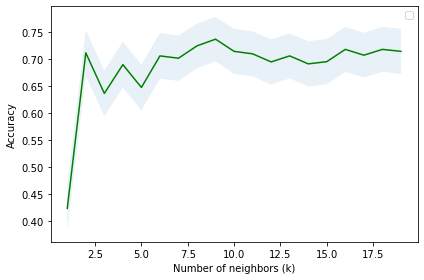

The best accuracy is 0.7368421052631579 with k= 9


In [86]:
plt.plot(range(1,ks), mean_acc, 'g')
plt.fill_between(range(1,ks), mean_acc-1*std_acc, mean_acc+1*std_acc, alpha=0.1)
plt.legend('Accuracy','+/-3 x std')
plt.ylabel('Accuracy')
plt.xlabel('Number of neighbors (k)')
plt.tight_layout()
plt.show()
print('The best accuracy is',mean_acc.max(),'with k=',mean_acc.argmax()+1)

So far the f1-score (0.74) seems to be the best accuracy evaluation for our knn classifier with k=9

### 3.2.2. Decision Trees
As we saw the accuracy of the developed classifier is not very high in the case of imbalanced data classification problem. At this step I try decision tree classifier as they do perform well in the case of imbalanced data.


In [87]:
import sklearn
from sklearn.tree import DecisionTreeClassifier

using the same x_features and target values:

In [88]:
#Modeling
CollTree = DecisionTreeClassifier(criterion='entropy', max_depth =3)
CollTree

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [89]:
CollTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [90]:
#Prediction
PredTree = CollTree.predict(X_test)
print(PredTree[0:5])
print(y_test[0:5])

[1 1 1 1 1]
[2 2 2 1 1]


### 3.2.2.1. Model performance evaluation
Using all of different performance measurments:

In [91]:
#Evaluation
from sklearn import metrics
print('Decision Trees f1-score:', metrics.f1_score(y_test, PredTree))
print('Decision Trees accuracy:', metrics.accuracy_score(y_test, PredTree))
print('Decision Trees precision:', metrics.precision_score(y_test, PredTree))
print('Decision Trees recall:', metrics.recall_score(y_test, PredTree))
print('Decision Trees jaccard similarity score:', metrics.jaccard_score(y_test, PredTree))

Decision Trees f1-score: 0.7109004739336494
Decision Trees accuracy: 0.5579710144927537
Decision Trees precision: 0.5555555555555556
Decision Trees recall: 0.9868421052631579
Decision Trees jaccard similarity score: 0.5514705882352942


Compare to KNN, decisions tree gives a slightly lower f1 score. Since I did not observe any improvement in model performance I will try Random Forest Classifier in the next step.

### 3.2.3. Random forest classifier

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
#Modeling
rfc = RandomForestClassifier(n_estimators=50)
rfc

RandomForestClassifier(n_estimators=50)

In [94]:
Coll_rfc = rfc.fit(X_train,y_train)

In [95]:
#Prediction
rfc_pred = Coll_rfc.predict(X_test)
rfc_pred[0:5]

array([1, 1, 2, 2, 1])

### 3.2.3.1. Model performance evaluation

In [96]:
#Evaluation
print('RandomForestClassifier Accuracy:', metrics.accuracy_score(y_test,rfc_pred))
print('RandomForestClassifier F1-score:', metrics.f1_score(y_test,rfc_pred))
print('RandomForestClassifier Precision:', metrics.precision_score(y_test,rfc_pred))
print('RandomForestClassifier Recall:', metrics.recall_score(y_test,rfc_pred))
print('RandomForestClassifier ROC-AUC:', metrics.roc_auc_score(y_test,rfc_pred))
print('RandomForestClassifier Jaccard similarity score:', metrics.jaccard_score(y_test,rfc_pred))

RandomForestClassifier Accuracy: 0.572463768115942
RandomForestClassifier F1-score: 0.6666666666666666
RandomForestClassifier Precision: 0.5841584158415841
RandomForestClassifier Recall: 0.7763157894736842
RandomForestClassifier ROC-AUC: 0.5494482173174872
RandomForestClassifier Jaccard similarity score: 0.5


According to the obtained accuracy numbers (Recall = 0.85, f1-score = 0.69) Random Forest Classifier seems to perform slightly worse than KNN and decision tree. In the next step I will try Logistic regression.

### 3.2.4. Logistic regression
As we know it is a statistical and machine learning technique fro classifying records of a dataset based on the values of the input fields.

In [97]:
import pylab as pl
import scipy.optimize as opt
from sklearn.linear_model import LogisticRegression

In [98]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [99]:
LR_pred = LR.predict(X_test)
LR_pred [0:5]

array([1, 1, 1, 1, 1])

In [100]:
pred_proba = LR.predict_proba (X_test)
pred_proba[0:5]

array([[0.6483677 , 0.3516323 ],
       [0.5647393 , 0.4352607 ],
       [0.56570463, 0.43429537],
       [0.56271013, 0.43728987],
       [0.6483677 , 0.3516323 ]])

In [101]:
from sklearn.metrics import classification_report, confusion_matrix

### 3.2.4.1. Model performance evaluation

In [102]:
print(classification_report(y_test, LR_pred))

              precision    recall  f1-score   support

           1       0.61      0.93      0.74        76
           2       0.76      0.26      0.39        62

    accuracy                           0.63       138
   macro avg       0.68      0.60      0.56       138
weighted avg       0.68      0.63      0.58       138



In [103]:
from sklearn.metrics import log_loss

In [104]:
print('LR Accuracy:', metrics.accuracy_score(y_test,LR_pred))
print('LR F1-score:', metrics.f1_score(y_test,LR_pred))
print('LR Precision:', metrics.precision_score(y_test,LR_pred))
print('LR Recall:', metrics.recall_score(y_test,LR_pred))
print('LR ROC-AUC:', metrics.roc_auc_score(y_test,LR_pred))
print('LR Jaccard similarity score:', metrics.jaccard_score(y_test,LR_pred))
print('LR log loss:',log_loss(y_test, pred_proba))

LR Accuracy: 0.6304347826086957
LR F1-score: 0.7357512953367875
LR Precision: 0.6068376068376068
LR Recall: 0.9342105263157895
LR ROC-AUC: 0.5961375212224108
LR Jaccard similarity score: 0.5819672131147541
LR log loss: 0.6618819338645635


Looking at the classification report for LR, we may see that it did not perform better than the previous classifiers. However if we pay close attention to the report, it can be seen that the minority class labels were predicted poorly. So, although we tried several classification algorithm we might tackle the problem by "resampling techniques" which can be oversampling the minority class or undersampling the majority class. Starting with oversampling minority class we will have:

## 3.3. Resampling Techniques
### 3.3.1. Oversampling the minority class

I split into train and test before oversampling. Oversampling before splitting the data can allow the exact same observations to be present in both the test set and train set. This can allow the model to simply memorize specific data points and cause overfitting and poor generalization to the test data. 

In [105]:
from sklearn.utils import resample

In [106]:
X_new= Coll_df[['ADDRTYPE','PERSONCOUNT','VEHCOUNT','INATTENTIONIND','UNDERINFL','LIGHTCOND','WEATHER','SPEEDING']]

In [107]:
X_new = preprocessing.StandardScaler().fit_transform(X_new)

In [108]:
X_new = pd.DataFrame(X_new)
type(X_new)

pandas.core.frame.DataFrame

In [109]:
y_new = Coll_df['SEVERITYCODE']
type(y_new)

pandas.core.series.Series

In [110]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=4)

In [111]:
#concatenate the training data back together
X_concat = pd.concat([X_train_new,y_train_new], axis=1)

In [112]:
#separate minority and majority class
X_concat.SEVERITYCODE.value_counts()

1    330
2    220
Name: SEVERITYCODE, dtype: int64

In [113]:
CODE_1 = X_concat[X_concat['SEVERITYCODE']==1]
CODE_2 = X_concat[X_concat['SEVERITYCODE']==2]

In [114]:
#upsample minority
CODE_2_upsampled = resample(CODE_2, replace =True, #sample with replacement
                           n_samples = len(CODE_1), #match number in majority class
                           random_state=27) #reproducible results
upsampled = pd.concat([CODE_1, CODE_2_upsampled])
#check new class counts
upsampled.SEVERITYCODE.value_counts()

2    330
1    330
Name: SEVERITYCODE, dtype: int64

After resampling we have an equal ratio of data points for each class. Let's try the two best models that we got so far. KNN and decision tree.

In [115]:
upsampled.reset_index(inplace=True, drop=True)
upsampled.head()

,0,1,2,3,4,5,6,7,SEVERITYCODE
0,-0.038152,1.648436,-0.028640,0.0,-0.30342,-0.108465,-0.997097,0.0,1
1,-0.038152,1.648436,2.434416,0.0,-0.30342,-0.108465,1.002911,0.0,1
2,-0.038152,5.155314,-0.028640,0.0,-0.30342,-0.108465,-0.997097,0.0,1
3,-0.038152,1.648436,1.202888,0.0,-0.30342,-0.108465,-0.997097,0.0,1
4,-0.038152,-0.455690,-0.028640,0.0,-0.30342,-0.108465,-0.997097,0.0,1


In [116]:
y_train_final = upsampled.SEVERITYCODE

In [117]:
X_train_final = upsampled.drop('SEVERITYCODE', axis=1)

In [118]:
#modeling 
#should be mentioned that k=5 is the best k with highest f1 score
k=5
upsampled_knn = KNeighborsClassifier(n_neighbors = k). fit(X_train_final, y_train_final)
upsampled_knn 

KNeighborsClassifier()

In [119]:
upsampled_knn_pred = upsampled_knn.predict(X_test_new)

In [120]:
#model evaluation
print('Unsampled KNN Accuracy:', metrics.accuracy_score(y_test_new,upsampled_knn_pred))
print('Unsampled KNN f1-score:', metrics.f1_score(y_test_new,upsampled_knn_pred))
print('Unsampled KNN precision:', metrics.precision_score(y_test_new,upsampled_knn_pred))
print('Unsampled KNN recall:', metrics.recall_score(y_test_new,upsampled_knn_pred))
print('Unsampled KNN roc-auc:', metrics.roc_auc_score(y_test_new,upsampled_knn_pred))

Unsampled KNN Accuracy: 0.6086956521739131
Unsampled KNN f1-score: 0.7300000000000001
Unsampled KNN precision: 0.5887096774193549
Unsampled KNN recall: 0.9605263157894737
Unsampled KNN roc-auc: 0.5689728353140917


Trying decision trees classifier:

In [121]:
#modeling
upsampled_dtc = DecisionTreeClassifier(criterion='entropy', max_depth =3).fit(X_train_final, y_train_final)
upsampled_dtc

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [122]:
Upsampled_dtc_pred = upsampled_dtc.predict(X_test_new)

In [123]:
#model evaluation
print('Upsampled dtc accuracy:', metrics.accuracy_score(y_test_new, Upsampled_dtc_pred))
print('Upsampled dtc f1-score:', metrics.f1_score(y_test_new, Upsampled_dtc_pred))
print('Upsampled dtc precision:', metrics.precision_score(y_test_new, Upsampled_dtc_pred))
print('Upsampled dtc recall:', metrics.recall_score(y_test_new, Upsampled_dtc_pred))
print('Upsampled dtc roc_auc:', metrics.roc_auc_score(y_test_new, Upsampled_dtc_pred))

Upsampled dtc accuracy: 0.6086956521739131
Upsampled dtc f1-score: 0.6931818181818182
Upsampled dtc precision: 0.61
Upsampled dtc recall: 0.8026315789473685
Upsampled dtc roc_auc: 0.5867996604414262


The F1 score for knn stays almost the same ater Upsampling and Recall increased. Let's see if undersampling might perform better.

### 3.3.2. Undersampling the majority class

Undersampling is defined as removing some observations of the majority class. It can be a good choice but since we do not have a ton of data here and we are removing information that my be valuable, it could leas to underfitting and poor generalization ot the test set.

I will use resampling module from sklearn to randomly remove samples from the majority class.

In [124]:
#still using separate classes of CODE_1 and CODE_2
#downsample the majority class
CODE_1_downsampled = resample(CODE_1,
                             replace=False,
                             n_samples=len(CODE_2),
                             random_state=27)
#combine minority class and downsampled majority class
downsampled = pd.concat([CODE_1_downsampled,CODE_2])

In [125]:
downsampled.SEVERITYCODE.value_counts()

2    220
1    220
Name: SEVERITYCODE, dtype: int64

In [126]:
downsampled.reset_index(inplace=True, drop=True)
downsampled.head()

,0,1,2,3,4,5,6,7,SEVERITYCODE
0,-0.038152,-0.45569,-0.028640,0.0,-0.30342,-0.108465,-0.997097,0.0,1
1,-0.038152,-0.45569,-0.028640,0.0,-0.30342,-0.108465,-0.997097,0.0,1
2,-0.038152,-0.45569,-0.028640,0.0,-0.30342,-0.108465,-0.997097,0.0,1
3,-0.038152,-0.45569,-1.260168,0.0,-0.30342,-0.108465,-0.997097,0.0,1
4,-0.038152,-0.45569,-0.028640,0.0,-0.30342,-0.108465,-0.997097,0.0,1


In [127]:
y_train_down = downsampled.SEVERITYCODE

In [128]:
X_train_down = downsampled.drop('SEVERITYCODE', axis=1)

In [129]:
#modeling and prediction
k=5
downsample_knn = KNeighborsClassifier(n_neighbors = k). fit(X_train_down, y_train_down)
down_knn_pred = downsample_knn.predict(X_test_new)

In [130]:
#model evaluation
print('downsampled KNN Accuracy:', metrics.accuracy_score(y_test_new,down_knn_pred))
print('downsampled KNN f1-score:', metrics.f1_score(y_test_new,down_knn_pred))
print('downsampled KNN precision:', metrics.precision_score(y_test_new,down_knn_pred))
print('downsampled KNN recall:', metrics.recall_score(y_test_new,down_knn_pred))
print('downsampled KNN roc-auc:', metrics.roc_auc_score(y_test_new,down_knn_pred))

downsampled KNN Accuracy: 0.6086956521739131
downsampled KNN f1-score: 0.7157894736842105
downsampled KNN precision: 0.5964912280701754
downsampled KNN recall: 0.8947368421052632
downsampled KNN roc-auc: 0.5764006791171478


In this case undersampling underperformed oversampling. Let's try one more method for handling out imbalanced data.

## 3.4. Generate synthetic samples

A technique similar to upsampling is to create synthetic samples. I will use imblearn's SMOTE or Synthetic Oversampling Technique which uses a nearest neighbors algorithm to generate new and synthetic data that we can use for training the model.
It is important to generate the new samples only in the training set to ensure our model generalize well to unseen data.

In [131]:
!pip install imblearn

In [145]:
from imblearn.over_sampling import SMOTE

In [146]:
# separate input features and target
y_ss = Coll_df.SEVERITYCODE

In [143]:
X_ss =  Coll_df[['ADDRTYPE','PERSONCOUNT','VEHCOUNT','INATTENTIONIND','UNDERINFL','LIGHTCOND','WEATHER','SPEEDING']]

In [144]:
X_ss = preprocessing.StandardScaler().fit_transform(X_ss)

In [147]:
#setting up test and train sets
X_ss_train, X_ss_test, y_ss_train, y_ss_test = train_test_split(X_ss, y_ss, test_size=0.2, random_state=4)

In [148]:
sm = SMOTE()
X_ss_train, y_ss_train = sm.fit_sample(X_ss_train,y_ss_train)

In [149]:
k=5
smote = KNeighborsClassifier(n_neighbors= k).fit(X_ss_train,y_ss_train)

In [150]:
smote_pred = smote.predict(X_ss_test)

In [151]:
#model evaluation
print('SMOTE KNN Accuracy:', metrics.accuracy_score(y_ss_test,smote_pred))
print('downsampled KNN f1-score:', metrics.f1_score(y_ss_test,smote_pred))
print('downsampled KNN precision:', metrics.precision_score(y_ss_test,smote_pred))
print('downsampled KNN recall:', metrics.recall_score(y_ss_test,smote_pred))
print('downsampled KNN roc-auc:', metrics.roc_auc_score(y_ss_test,smote_pred))

SMOTE KNN Accuracy: 0.5869565217391305
downsampled KNN f1-score: 0.6984126984126985
downsampled KNN precision: 0.584070796460177
downsampled KNN recall: 0.868421052631579
downsampled KNN roc-auc: 0.5551782682512734


The f1 score and recall are not higher than the previous models, for this data the synthetic sampling underperformed oversampling.

# Conclusion

I have explored 5 different methods for dealing with imbalanced dataset:
1. Changing the performance matrix
2. Changing the classification algorithm
3. Oversample minority class
4. Undersample majority class
5. Generate synthetic samples
    

It seems for this particular dataset K-nearest neighbors and oversampling are among the best of the options I tried. There might be other techniques to apply including chaning the class ratios other than 1:1. However it is better to improve the number of data points in the dataset to be able to train a much more accurate classifier.